In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import sys
%matplotlib inline 

In [2]:
model_name = "1LayerFasterLearning.h5py"

In [3]:
# os.chdir('./../../../../../data/hongtao')
be = h5py.File('./../../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [4]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_m', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)

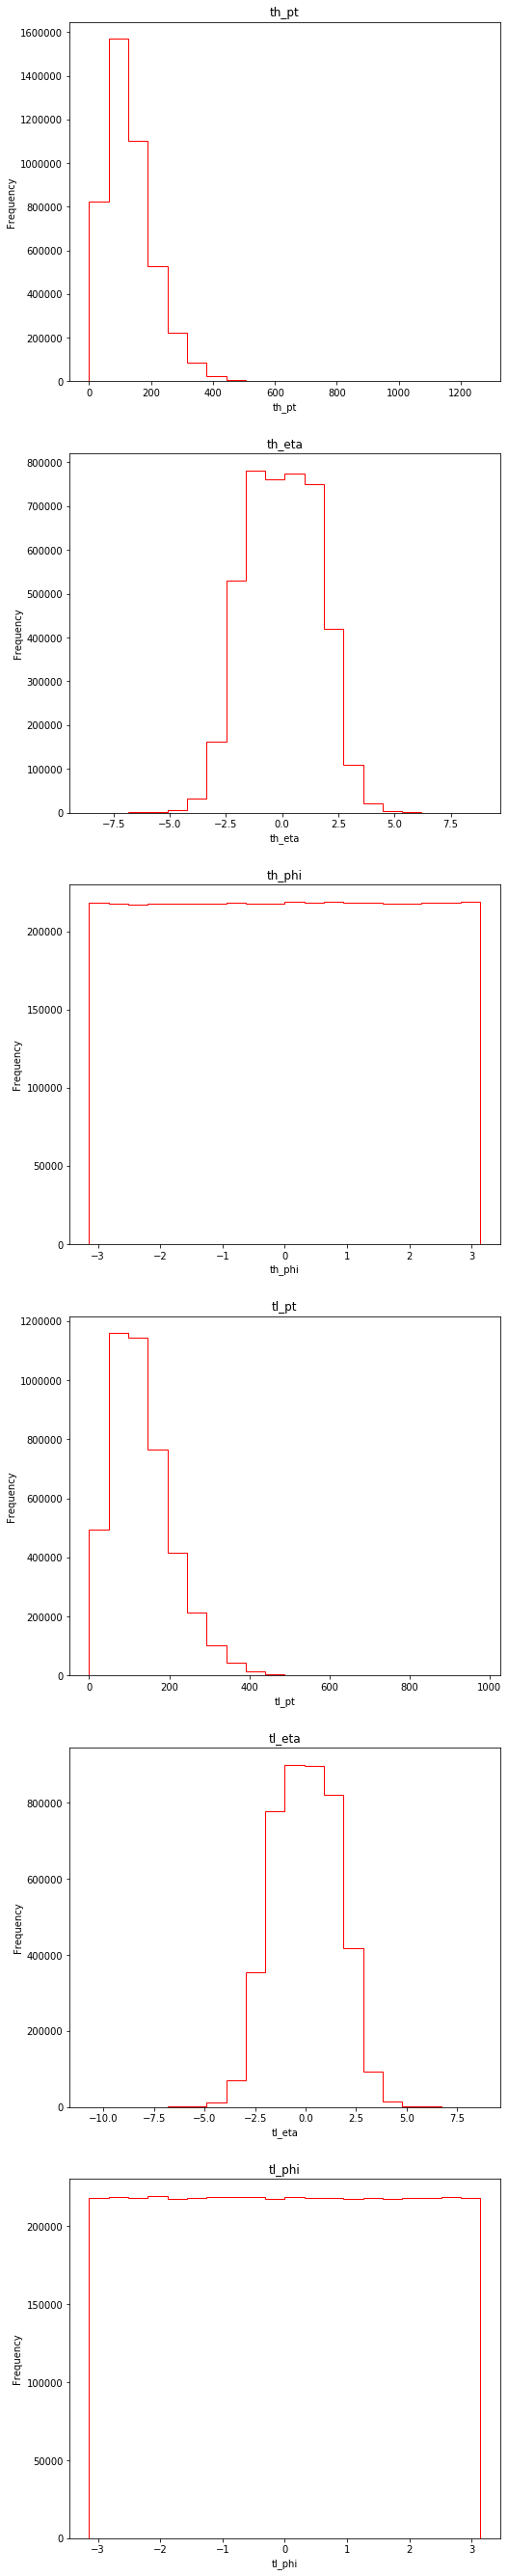

In [5]:
# Original variables

plt.figure(figsize=(8,8*output_length))
for i in range(0, output_length):
    plt.subplot(output_length,1,i+1)
    plt.hist(dataset.get(output_keys[i]), 20, histtype = 'step', color='r')
    plt.xlabel(output_keys[i])
    plt.ylabel('Frequency')
    plt.title(output_keys[i])

In [6]:
# Convert into numpy arrays and mean normalize
crop =  100000

input_arrays = []
output_arrays = [] 
in_std = []
in_mean = []
out_std = []
out_mean = []

# for key in input_keys:
#     exec(key + ' = np.array(dataset.get(key))[0:crop].reshape((1,-1))')
#     exec('{0} = ({0} - np.mean({0}))/np.std({0})'.format(key))
#     exec('input_arrays.append({0})'.format(key))

    
def convert_normalize(keys, std, mean, total):
    for x in keys:
        var = np.array(dataset.get(x))[0:crop].reshape((1,-1))
        sig = np.std(var)
        mu = np.mean(var)
        std.append(sig)
        mean.append(mu)
        var = (var - mu)/sig 
        total.append(var)

    
convert_normalize(input_keys, in_std, in_mean, input_arrays)
convert_normalize(output_keys, out_std, out_mean, output_arrays)

out_std = np.array(out_std).reshape((1,-1))
out_mean = np.array(out_mean).reshape((1,-1))
in_std = np.array(in_std).reshape((1,-1))
in_mean = np.array(in_mean).reshape((1,-1))

In [7]:
# Create input and test array
split = int(np.floor(0.8*crop)) # 80/20 split 
shuffle = True
    
total_input = np.stack(input_arrays).reshape((crop, len(input_keys)))
total_output = np.stack(output_arrays).reshape((crop, len(output_keys)))

if shuffle:
    rng_state = np.random.get_state()
    np.random.shuffle(total_input)
    np.random.set_state(rng_state)
    np.random.shuffle(total_output)
    
# size = total_input.shape
# total_input = np.array(np.random.normal(size=total_input.shape))

train_input, test_input = total_input[0:split, :], total_input[split:, :]
train_output, test_output = total_output[0:split,:], total_output[split:,:]

In [8]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

(80000, 46) (80000, 6)
(20000, 46) (20000, 6)


In [9]:
# Build model

# optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


def build_model():
    model = keras.Sequential([
        layers.Dense(128,  input_shape=[len(input_keys)], activation='relu'),
        layers.Dense(64,  input_shape=[len(input_keys)], activation='relu'),
        layers.Dense(32,  input_shape=[len(input_keys)], activation='relu'),
        layers.Dense(len(output_keys), activation='linear')
    ])
    
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model 

# def build_model():
#     model = keras.Sequential([
#         layers.Dense(6, activation='linear', 
#                      input_shape=[len(input_keys)])])
    
#     model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    
#     return model 
    

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6016      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 16,550
Trainable params: 16,550
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit model

Epochs= 1024

history = model.fit(train_input, train_output, verbose=1, epochs=Epochs, 
                   validation_split=0.2, shuffle=True,
                   batch_size=512)


Epoch 1/1024
125/125 [==============================] - 1s 4ms/step - loss: 1.0750 - mse: 1.0750 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 2/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0263 - mse: 1.0263 - val_loss: 1.0227 - val_mse: 1.0227
Epoch 3/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0166 - mse: 1.0166 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 4/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0119 - mse: 1.0119 - val_loss: 1.0142 - val_mse: 1.0142
Epoch 5/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0090 - mse: 1.0090 - val_loss: 1.0123 - val_mse: 1.0123
Epoch 6/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0111 - val_mse: 1.0111
Epoch 7/1024
125/125 [==============================] - 0s 4ms/step - loss: 1.0056 - mse: 1.0056 - val_loss: 1.0103 - val_mse: 1.0103
Epoch 8/1024
125/125 [==============================] - 1s 4ms

Epoch 62/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9836 - mse: 0.9836 - val_loss: 1.0152 - val_mse: 1.0152
Epoch 63/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9833 - mse: 0.9833 - val_loss: 1.0155 - val_mse: 1.0155
Epoch 64/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9830 - mse: 0.9830 - val_loss: 1.0157 - val_mse: 1.0157
Epoch 65/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9827 - mse: 0.9827 - val_loss: 1.0161 - val_mse: 1.0161
Epoch 66/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9824 - mse: 0.9824 - val_loss: 1.0163 - val_mse: 1.0163
Epoch 67/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9821 - mse: 0.9821 - val_loss: 1.0165 - val_mse: 1.0165
Epoch 68/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9818 - mse: 0.9818 - val_loss: 1.0167 - val_mse: 1.0167
Epoch 69/1024
125/125 [==============================] 

125/125 [==============================] - 0s 4ms/step - loss: 0.9681 - mse: 0.9681 - val_loss: 1.0297 - val_mse: 1.0297
Epoch 123/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9679 - mse: 0.9679 - val_loss: 1.0298 - val_mse: 1.0298
Epoch 124/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9677 - mse: 0.9677 - val_loss: 1.0303 - val_mse: 1.0303
Epoch 125/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9675 - mse: 0.9675 - val_loss: 1.0302 - val_mse: 1.0302
Epoch 126/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9673 - mse: 0.9673 - val_loss: 1.0302 - val_mse: 1.0302
Epoch 127/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9670 - mse: 0.9670 - val_loss: 1.0308 - val_mse: 1.0308
Epoch 128/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9668 - mse: 0.9668 - val_loss: 1.0311 - val_mse: 1.0311
Epoch 129/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9574 - mse: 0.9574 - val_loss: 1.0413 - val_mse: 1.0413
Epoch 183/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9572 - mse: 0.9572 - val_loss: 1.0419 - val_mse: 1.0419
Epoch 184/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9571 - mse: 0.9571 - val_loss: 1.0425 - val_mse: 1.0425
Epoch 185/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9569 - mse: 0.9569 - val_loss: 1.0418 - val_mse: 1.0418
Epoch 186/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9568 - mse: 0.9568 - val_loss: 1.0421 - val_mse: 1.0421
Epoch 187/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9567 - mse: 0.9567 - val_loss: 1.0424 - val_mse: 1.0424
Epoch 188/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9565 - mse: 0.9565 - val_loss: 1.0425 - val_mse: 1.0425
Epoch 189/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9498 - mse: 0.9498 - val_loss: 1.0511 - val_mse: 1.0511
Epoch 243/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9497 - mse: 0.9497 - val_loss: 1.0519 - val_mse: 1.0519
Epoch 244/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9497 - mse: 0.9497 - val_loss: 1.0513 - val_mse: 1.0513
Epoch 245/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9495 - mse: 0.9495 - val_loss: 1.0515 - val_mse: 1.0515
Epoch 246/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9494 - mse: 0.9494 - val_loss: 1.0519 - val_mse: 1.0519
Epoch 247/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9493 - mse: 0.9493 - val_loss: 1.0520 - val_mse: 1.0520
Epoch 248/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9492 - mse: 0.9492 - val_loss: 1.0522 - val_mse: 1.0522
Epoch 249/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9442 - mse: 0.9442 - val_loss: 1.0584 - val_mse: 1.0584
Epoch 303/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9441 - mse: 0.9441 - val_loss: 1.0582 - val_mse: 1.0582
Epoch 304/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9440 - mse: 0.9440 - val_loss: 1.0582 - val_mse: 1.0582
Epoch 305/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9439 - mse: 0.9439 - val_loss: 1.0585 - val_mse: 1.0585
Epoch 306/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9438 - mse: 0.9438 - val_loss: 1.0590 - val_mse: 1.0590
Epoch 307/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9437 - mse: 0.9437 - val_loss: 1.0589 - val_mse: 1.0589
Epoch 308/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9436 - mse: 0.9436 - val_loss: 1.0587 - val_mse: 1.0587
Epoch 309/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9395 - mse: 0.9395 - val_loss: 1.0640 - val_mse: 1.0640
Epoch 363/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9394 - mse: 0.9394 - val_loss: 1.0637 - val_mse: 1.0637
Epoch 364/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9393 - mse: 0.9393 - val_loss: 1.0639 - val_mse: 1.0639
Epoch 365/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9392 - mse: 0.9392 - val_loss: 1.0640 - val_mse: 1.0640
Epoch 366/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9392 - mse: 0.9392 - val_loss: 1.0642 - val_mse: 1.0642
Epoch 367/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9391 - mse: 0.9391 - val_loss: 1.0639 - val_mse: 1.0639
Epoch 368/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9390 - mse: 0.9390 - val_loss: 1.0640 - val_mse: 1.0640
Epoch 369/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9355 - mse: 0.9355 - val_loss: 1.0689 - val_mse: 1.0689
Epoch 423/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9354 - mse: 0.9354 - val_loss: 1.0684 - val_mse: 1.0684
Epoch 424/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9354 - mse: 0.9354 - val_loss: 1.0694 - val_mse: 1.0694
Epoch 425/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9353 - mse: 0.9353 - val_loss: 1.0688 - val_mse: 1.0688
Epoch 426/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9353 - mse: 0.9353 - val_loss: 1.0688 - val_mse: 1.0688
Epoch 427/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9352 - mse: 0.9352 - val_loss: 1.0694 - val_mse: 1.0694
Epoch 428/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9352 - mse: 0.9352 - val_loss: 1.0695 - val_mse: 1.0695
Epoch 429/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9321 - mse: 0.9321 - val_loss: 1.0728 - val_mse: 1.0728
Epoch 483/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9321 - mse: 0.9321 - val_loss: 1.0732 - val_mse: 1.0732
Epoch 484/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9321 - mse: 0.9321 - val_loss: 1.0729 - val_mse: 1.0729
Epoch 485/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9319 - mse: 0.9319 - val_loss: 1.0728 - val_mse: 1.0728
Epoch 486/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9319 - mse: 0.9319 - val_loss: 1.0734 - val_mse: 1.0734
Epoch 487/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9319 - mse: 0.9319 - val_loss: 1.0734 - val_mse: 1.0734
Epoch 488/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9318 - mse: 0.9318 - val_loss: 1.0729 - val_mse: 1.0729
Epoch 489/1024
125/125 [==============================] - 1s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9292 - mse: 0.9292 - val_loss: 1.0773 - val_mse: 1.0773
Epoch 543/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9291 - mse: 0.9291 - val_loss: 1.0768 - val_mse: 1.0768
Epoch 544/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9290 - mse: 0.9290 - val_loss: 1.0773 - val_mse: 1.0773
Epoch 545/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9291 - mse: 0.9291 - val_loss: 1.0774 - val_mse: 1.0774
Epoch 546/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9290 - mse: 0.9290 - val_loss: 1.0772 - val_mse: 1.0772
Epoch 547/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9289 - mse: 0.9289 - val_loss: 1.0768 - val_mse: 1.0768
Epoch 548/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9289 - mse: 0.9289 - val_loss: 1.0770 - val_mse: 1.0770
Epoch 549/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9266 - mse: 0.9266 - val_loss: 1.0801 - val_mse: 1.0801
Epoch 603/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9265 - mse: 0.9265 - val_loss: 1.0802 - val_mse: 1.0802
Epoch 604/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9265 - mse: 0.9265 - val_loss: 1.0797 - val_mse: 1.0797
Epoch 605/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9264 - mse: 0.9264 - val_loss: 1.0805 - val_mse: 1.0805
Epoch 606/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9264 - mse: 0.9264 - val_loss: 1.0805 - val_mse: 1.0805
Epoch 607/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9264 - mse: 0.9264 - val_loss: 1.0807 - val_mse: 1.0807
Epoch 608/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9263 - mse: 0.9263 - val_loss: 1.0807 - val_mse: 1.0807
Epoch 609/1024
125/125 [==============================] - 1s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9244 - mse: 0.9244 - val_loss: 1.0831 - val_mse: 1.0831
Epoch 663/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9244 - mse: 0.9244 - val_loss: 1.0833 - val_mse: 1.0833
Epoch 664/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9243 - mse: 0.9243 - val_loss: 1.0837 - val_mse: 1.0837
Epoch 665/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9243 - mse: 0.9243 - val_loss: 1.0841 - val_mse: 1.0841
Epoch 666/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9242 - mse: 0.9242 - val_loss: 1.0836 - val_mse: 1.0836
Epoch 667/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9242 - mse: 0.9242 - val_loss: 1.0839 - val_mse: 1.0839
Epoch 668/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9241 - mse: 0.9241 - val_loss: 1.0833 - val_mse: 1.0833
Epoch 669/1024
125/125 [==============================] - 1s 4m

125/125 [==============================] - 1s 4ms/step - loss: 0.9225 - mse: 0.9225 - val_loss: 1.0854 - val_mse: 1.0854
Epoch 723/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9224 - mse: 0.9224 - val_loss: 1.0862 - val_mse: 1.0862
Epoch 724/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9224 - mse: 0.9224 - val_loss: 1.0860 - val_mse: 1.0860
Epoch 725/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9224 - mse: 0.9224 - val_loss: 1.0859 - val_mse: 1.0859
Epoch 726/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9224 - mse: 0.9224 - val_loss: 1.0860 - val_mse: 1.0860
Epoch 727/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9223 - mse: 0.9223 - val_loss: 1.0861 - val_mse: 1.0861
Epoch 728/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9223 - mse: 0.9223 - val_loss: 1.0863 - val_mse: 1.0863
Epoch 729/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9207 - mse: 0.9207 - val_loss: 1.0884 - val_mse: 1.0884
Epoch 783/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9206 - mse: 0.9206 - val_loss: 1.0880 - val_mse: 1.0880
Epoch 784/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9206 - mse: 0.9206 - val_loss: 1.0889 - val_mse: 1.0889
Epoch 785/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9206 - mse: 0.9206 - val_loss: 1.0890 - val_mse: 1.0890
Epoch 786/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9205 - mse: 0.9205 - val_loss: 1.0885 - val_mse: 1.0885
Epoch 787/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9205 - mse: 0.9205 - val_loss: 1.0888 - val_mse: 1.0888
Epoch 788/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9205 - mse: 0.9205 - val_loss: 1.0889 - val_mse: 1.0889
Epoch 789/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9191 - mse: 0.9191 - val_loss: 1.0911 - val_mse: 1.0911
Epoch 843/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9190 - mse: 0.9190 - val_loss: 1.0909 - val_mse: 1.0909
Epoch 844/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9190 - mse: 0.9190 - val_loss: 1.0911 - val_mse: 1.0911
Epoch 845/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9190 - mse: 0.9190 - val_loss: 1.0915 - val_mse: 1.0915
Epoch 846/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9189 - mse: 0.9189 - val_loss: 1.0909 - val_mse: 1.0909
Epoch 847/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9189 - mse: 0.9189 - val_loss: 1.0912 - val_mse: 1.0912
Epoch 848/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9189 - mse: 0.9189 - val_loss: 1.0920 - val_mse: 1.0920
Epoch 849/1024
125/125 [==============================] - 1s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9176 - mse: 0.9176 - val_loss: 1.0925 - val_mse: 1.0925
Epoch 903/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9175 - mse: 0.9175 - val_loss: 1.0936 - val_mse: 1.0936
Epoch 904/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9175 - mse: 0.9175 - val_loss: 1.0938 - val_mse: 1.0938
Epoch 905/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9175 - mse: 0.9175 - val_loss: 1.0936 - val_mse: 1.0936
Epoch 906/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9174 - mse: 0.9174 - val_loss: 1.0930 - val_mse: 1.0930
Epoch 907/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9174 - mse: 0.9174 - val_loss: 1.0932 - val_mse: 1.0932
Epoch 908/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9174 - mse: 0.9174 - val_loss: 1.0931 - val_mse: 1.0931
Epoch 909/1024
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9161 - mse: 0.9161 - val_loss: 1.0947 - val_mse: 1.0947
Epoch 963/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9162 - mse: 0.9162 - val_loss: 1.0952 - val_mse: 1.0952
Epoch 964/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9161 - mse: 0.9161 - val_loss: 1.0950 - val_mse: 1.0950
Epoch 965/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9161 - mse: 0.9161 - val_loss: 1.0946 - val_mse: 1.0946
Epoch 966/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9161 - mse: 0.9161 - val_loss: 1.0956 - val_mse: 1.0956
Epoch 967/1024
125/125 [==============================] - 1s 4ms/step - loss: 0.9160 - mse: 0.9160 - val_loss: 1.0946 - val_mse: 1.0946
Epoch 968/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9160 - mse: 0.9160 - val_loss: 1.0951 - val_mse: 1.0951
Epoch 969/1024
125/125 [==============================] - 1s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.9149 - mse: 0.9149 - val_loss: 1.0975 - val_mse: 1.0975
Epoch 1023/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9149 - mse: 0.9149 - val_loss: 1.0966 - val_mse: 1.0966
Epoch 1024/1024
125/125 [==============================] - 0s 4ms/step - loss: 0.9148 - mse: 0.9148 - val_loss: 1.0963 - val_mse: 1.0963


In [12]:
history.history.keys()
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 1LayerFasterLearning.h5py/assets


Text(0.5, 1.0, 'MSE loss')

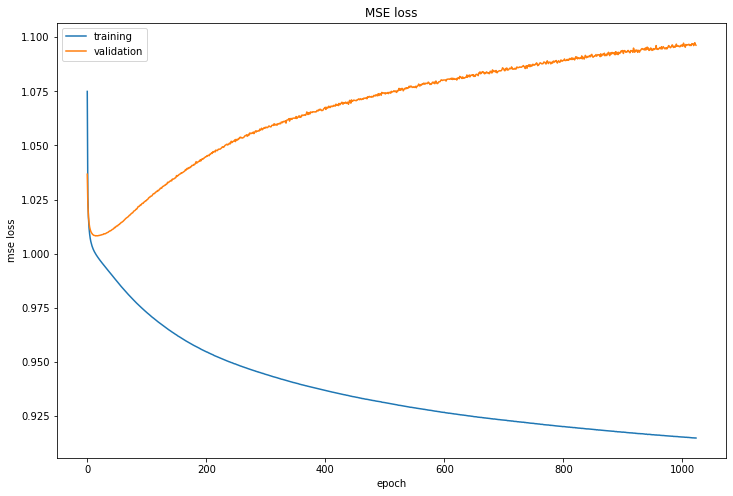

In [13]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('MSE loss')

In [14]:
predictions = model.predict(test_input)

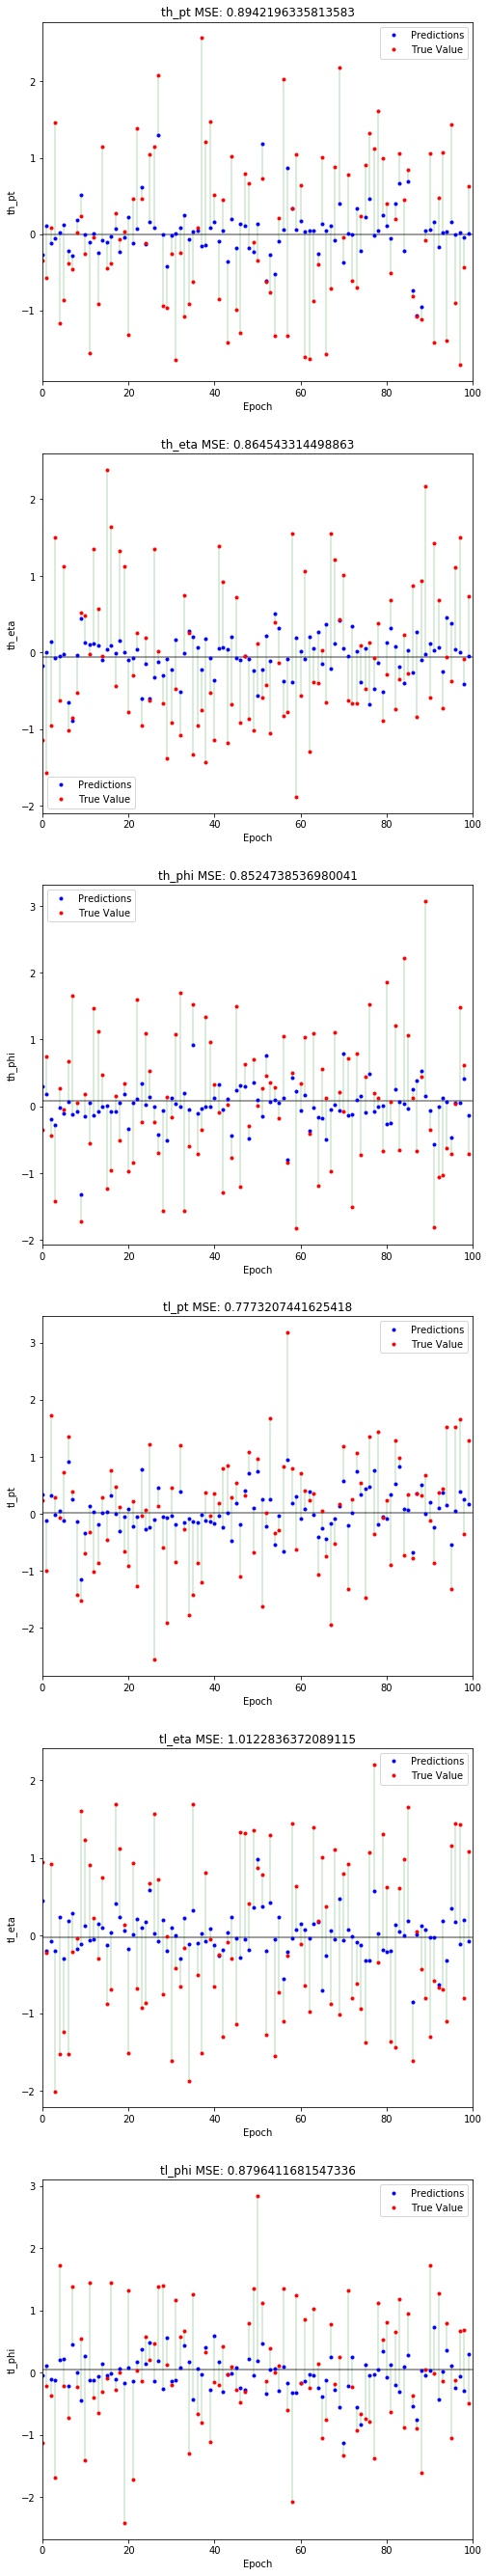

In [15]:
# Training 
crop = 100 

train_small = model.predict(train_input[0:100,:])
output_small = train_output[0:100,:]

def comparison_plot(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0,output_length):
        plt.subplot(output_length,1,i+1)
        plt.plot(range(0,crop), compare[:,i], 'bo', markersize=3, label = 'Predictions')
        plt.plot(range(0,crop), true[:,i], 'ro', markersize=3, label = 'True Value')
        ym, yM = plt.ylim()
        for x in range(100):
            plt.vlines(x, color='g', linestyle='-', alpha=0.2, ymin= 
                        min(compare[x,i], true[x,i]), 
                        ymax= max(compare[x,i], true[x,i]))
        plt.hlines(np.mean(true[:,i]), xmin=-20, xmax=crop+20, alpha=0.5)
        MSE = 1/compare[:,i].size*np.sum((compare[:,i]- true[:,i])**2)
        plt.xlabel('Epoch')
        plt.ylabel(output_keys[i])
        plt.xlim(0, crop)
        plt.title(output_keys[i] + " MSE: " + str(MSE))
        plt.legend()

comparison_plot(train_small, output_small)

In [16]:
# Predictions

predictions_small = predictions[0:crop,:]
test_output_small = test_output[0:crop,:]

MSE = 1/predictions.size*np.sum((predictions- test_output)**2)
print("total MSE: " + str(MSE))

for i in range(output_length):
    MSE = 1/predictions[:,i].size*np.sum((predictions[:,i] -test_output[:,i])**2)
    print("{0} MSE : ".format(output_keys[i]), '%.10f'%MSE)

total MSE: 1.0843714042659434
th_pt MSE :  1.1002151389
th_eta MSE :  1.0807545810
th_phi MSE :  1.0614524107
tl_pt MSE :  1.1245385845
tl_eta MSE :  1.0564573511
tl_phi MSE :  1.0828103593


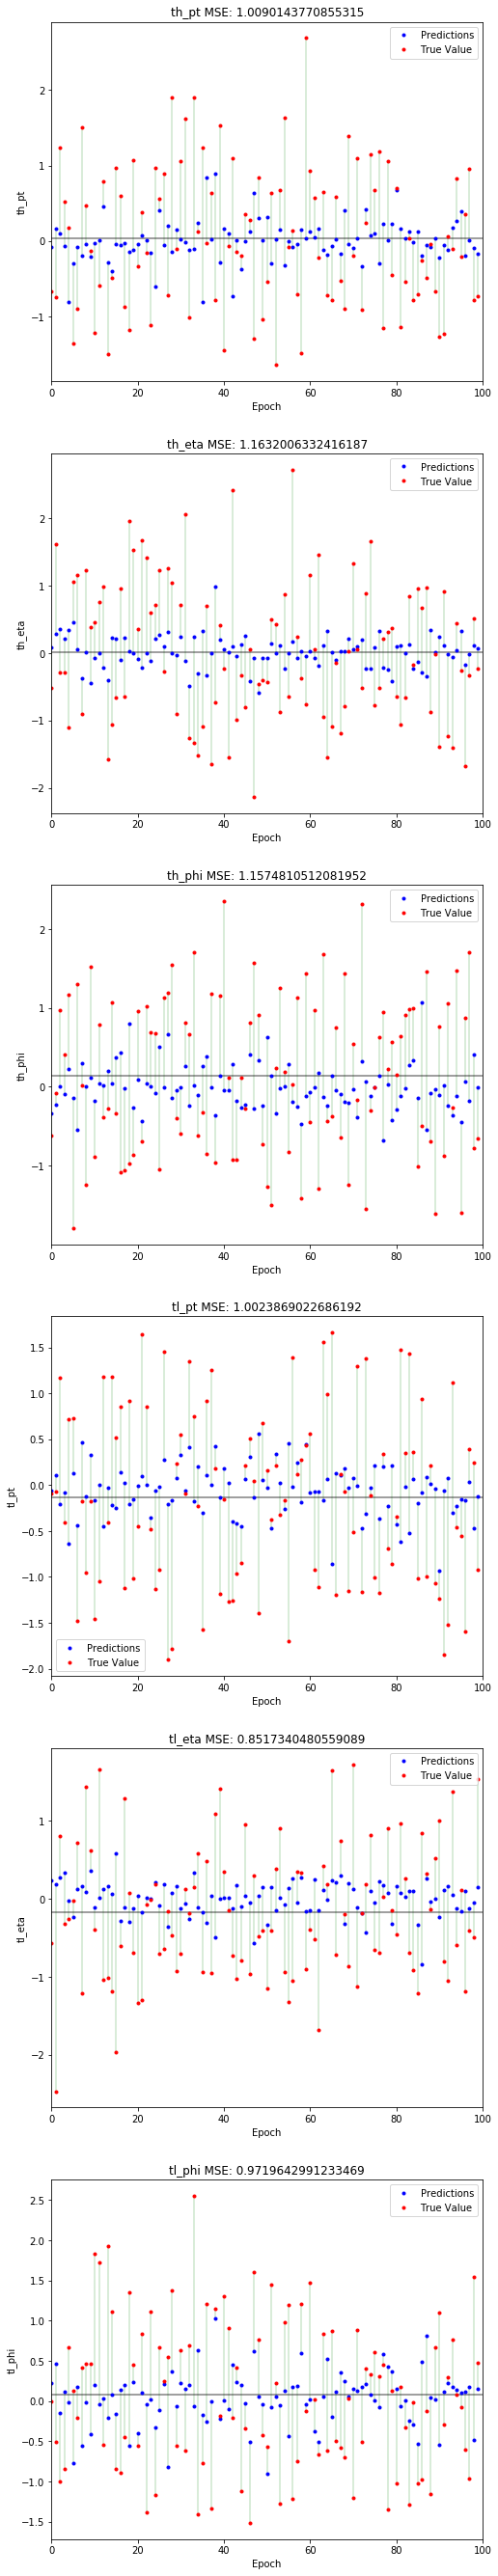

In [17]:
comparison_plot(predictions_small, test_output_small)

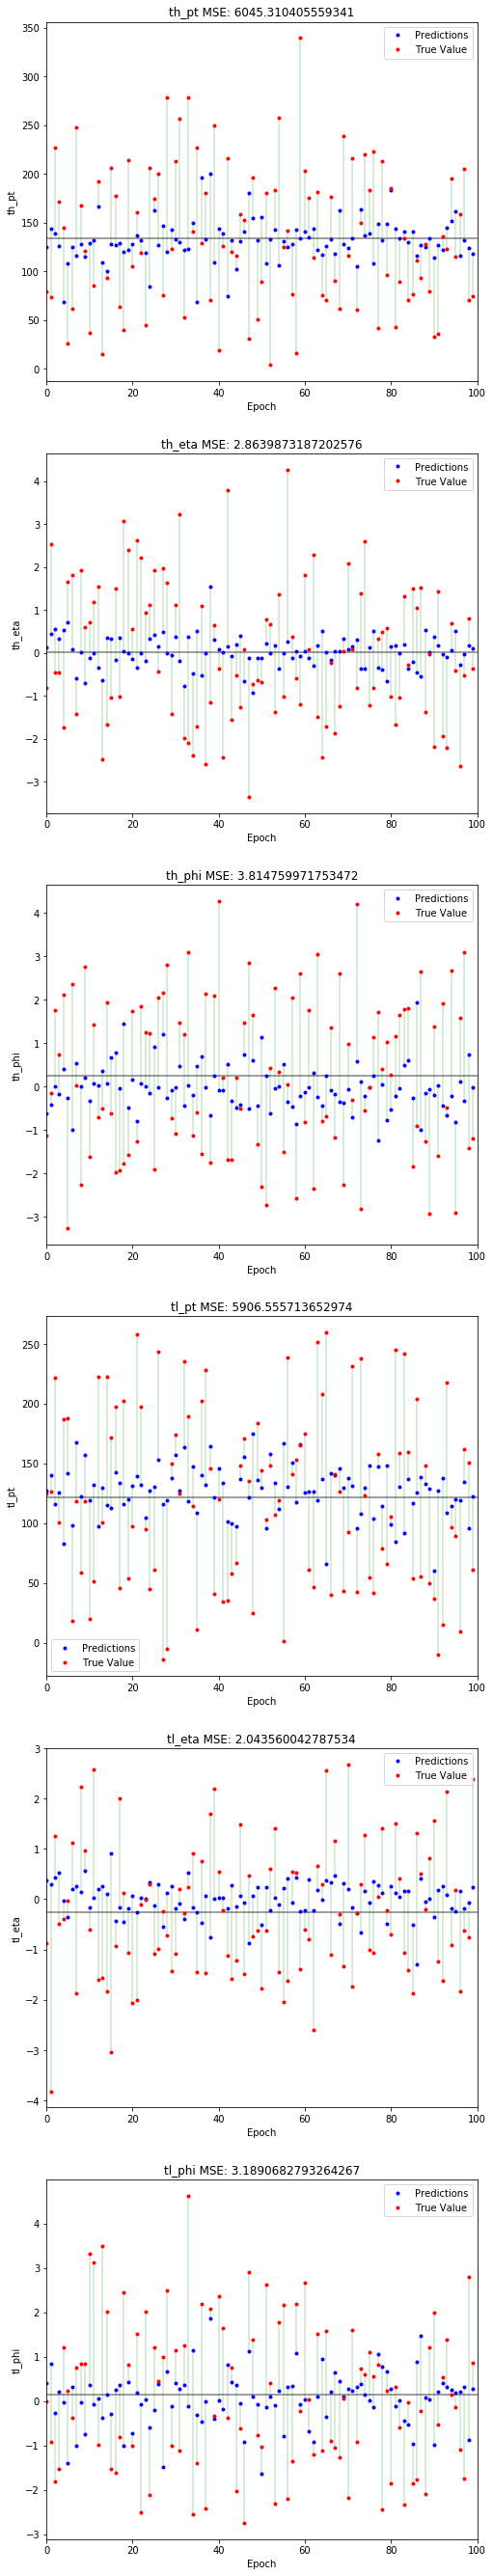

In [18]:
# Back to original units 

scaled_predictions = predictions*out_std + out_mean
scaled_output = test_output*out_std + out_mean

comparison_plot(scaled_predictions[0:crop,:], scaled_output[0:crop,:])


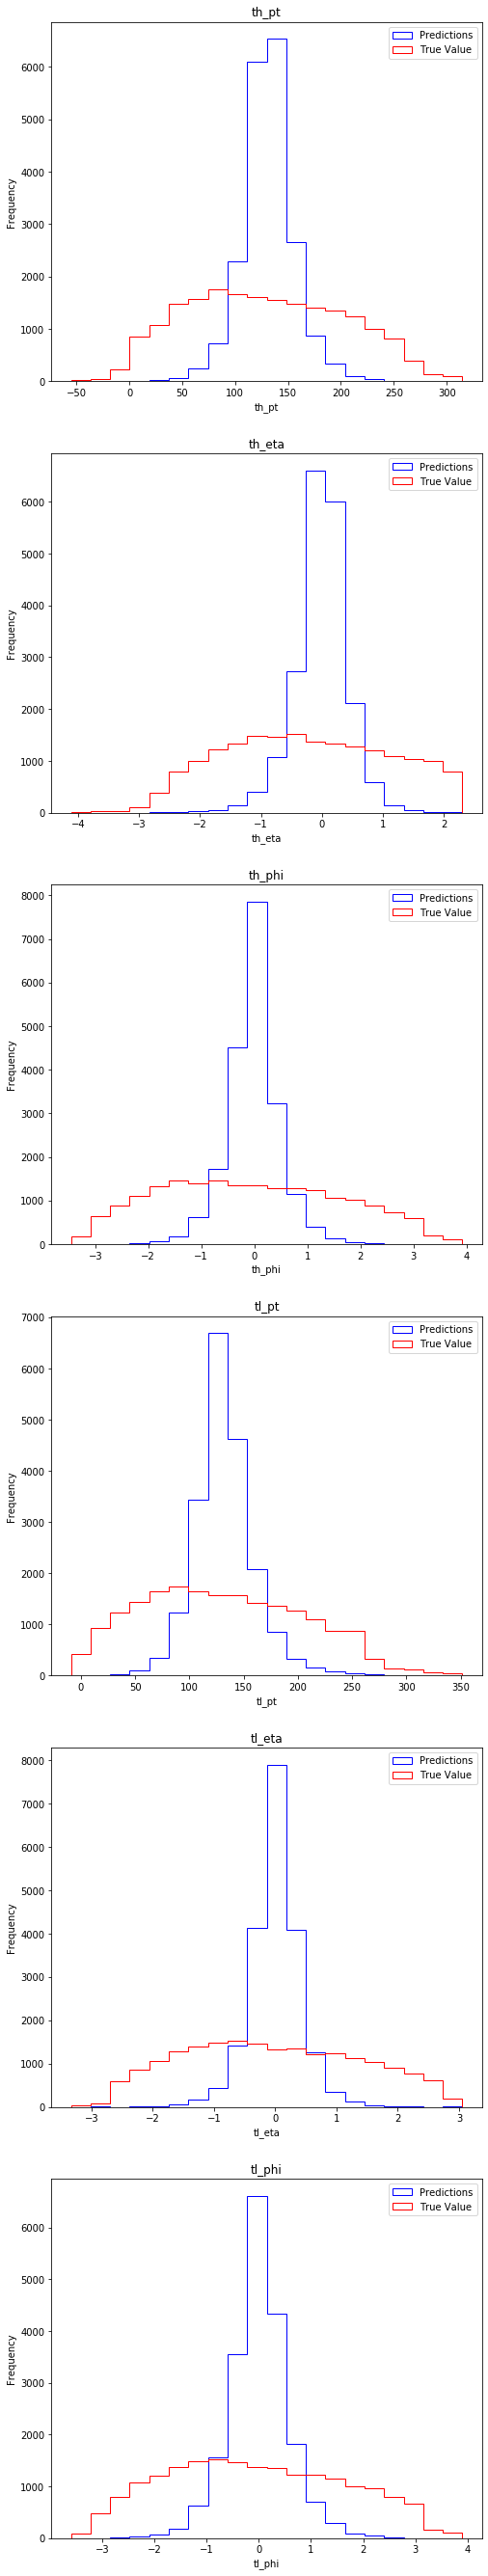

In [19]:
# Histograms 

def histograms_compare(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(compare[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms_compare(scaled_predictions, scaled_output)

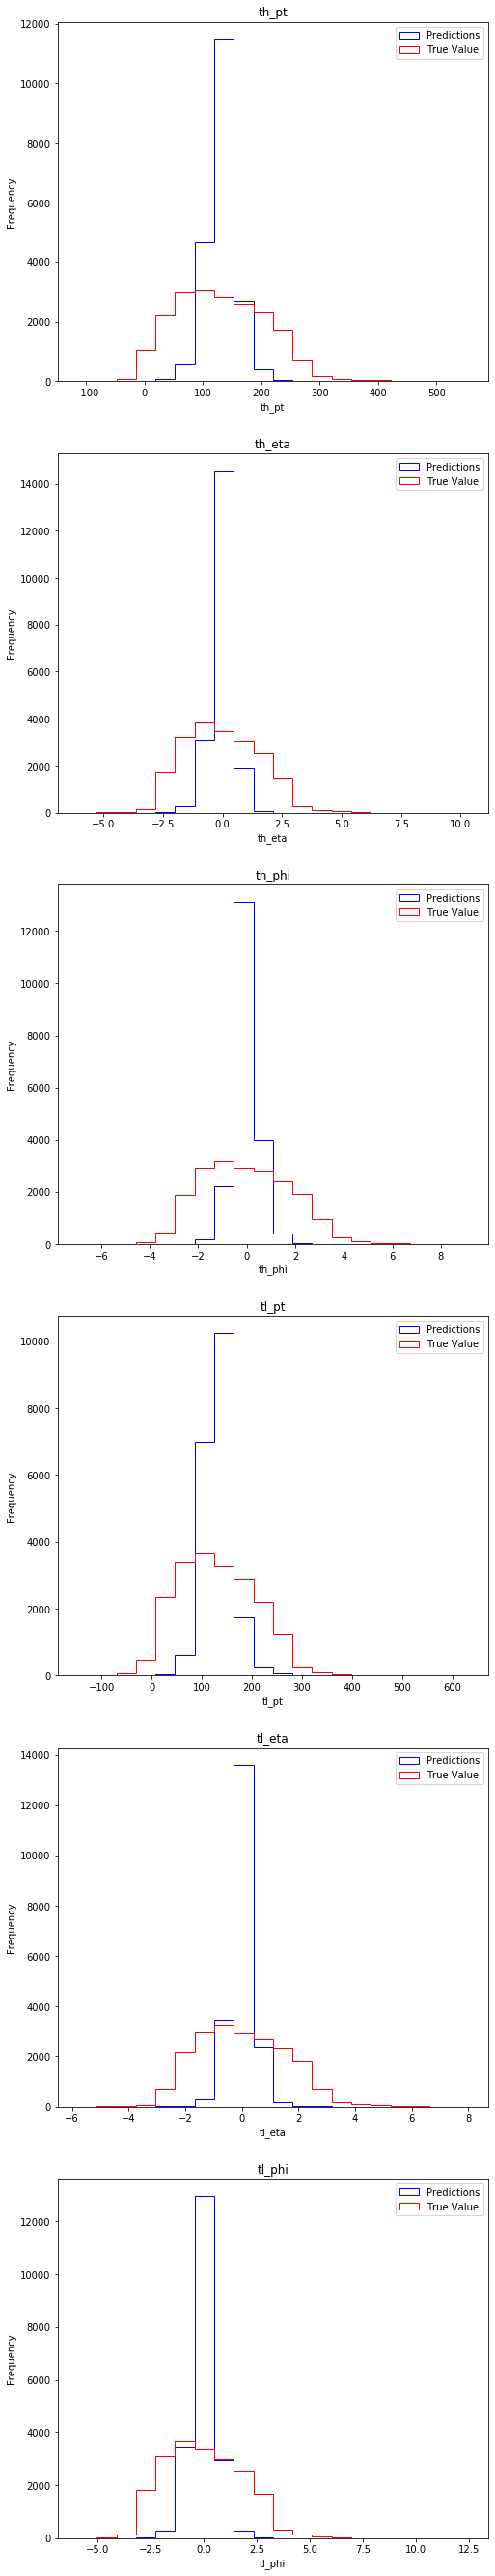

In [20]:
# Histograms 

def histograms_true(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(true[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histogram_true(scaled_predictions, scaled_output)